In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import numpy as np
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.plotsettings import *

%matplotlib inline

In [13]:
all_res = glob("out/**/*.pkl")

In [14]:
all_res

['out/20230205_181812/summary.pkl',
 'out/20230207_231442/summary.pkl',
 'out/20230205_122152/summary.pkl',
 'out/20230212_235457_/summary.pkl',
 'out/20230205_193510/summary.pkl',
 'out/20230212_234940_/summary.pkl',
 'out/20230213_001139_/summary.pkl',
 'out/20230207_100603/summary.pkl',
 'out/20230212_230603_/summary.pkl',
 'out/20230210_043446/summary.pkl',
 'out/20230213_001049_/summary.pkl',
 'out/20230210_055149/summary.pkl',
 'out/20230213_121138_/summary.pkl',
 'out/20230212_225209_/summary.pkl',
 'out/20230213_001003_/summary.pkl',
 'out/20230201_191443/summary.pkl',
 'out/20230208_142001/summary.pkl',
 'out/20230206_030833/summary.pkl',
 'out/20230208_014348/summary.pkl',
 'out/20230207_020433/summary.pkl',
 'out/20230205_123216/summary.pkl',
 'out/20230206_224735/summary.pkl',
 'out/20230206_134740/summary.pkl',
 'out/20230214_040626_/summary.pkl',
 'out/20230207_134727/summary.pkl',
 'out/20230213_000325_/summary.pkl',
 'out/20230212_235805_/summary.pkl',
 'out/20230212_23

In [15]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    num_points = loaded["train_size"]

    try:
        metrics = {
            "num_train_points": loaded["train_size"],
            "mae": loaded["mean_absolute_error"],
            "max_error": loaded["max_error"],
            "mse": loaded["mean_squared_error"],
            "target": loaded["target"],
        }

        compiled_res.append(metrics)
    except Exception:
        pass

    try:
        gpr_metrics = {
            "num_train_points": loaded["train_size"],
            "mae": loaded["baseline"]["xgb_metrics"]["mean_absolute_error"],
            "max_error": loaded["baseline"]["xgb_metrics"]["max_error"],
            "mse": loaded["baseline"]["xgb_metrics"]["mean_squared_error"],
            "target": loaded["target"],
        }

        compiled_gpr.append(gpr_metrics)
    except Exception:
        pass

In [ ]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [ ]:
compiled_res

,num_train_points,mae,max_error,mse,target
0,50,0.895925,3.494637,1.271837,"(logKH_CO2, CO2 Henry coefficient)"
1,20,1.022721,3.869490,1.840816,"(logKH_CO2, CO2 Henry coefficient)"
2,10,NaN,NaN,NaN,"(logKH_CH4, CH4 Henry coefficient)"
3,100,0.401663,3.127951,0.328874,"(logKH_CH4, CH4 Henry coefficient)"
4,200,0.844188,4.078015,1.277903,"(logKH_CO2, CO2 Henry coefficient)"
5,1000,0.319848,1.664489,0.185667,"(logKH_CH4, CH4 Henry coefficient)"
6,1000,0.334091,1.829350,0.202126,"(logKH_CH4, CH4 Henry coefficient)"
7,10,NaN,NaN,NaN,"(logKH_CH4, CH4 Henry coefficient)"
8,500,0.819581,4.279287,1.138667,"(logKH_CO2, CO2 Henry coefficient)"
9,200,NaN,NaN,NaN,"(logKH_CH4, CH4 Henry coefficient)"


In [6]:
compiled_grouped_res = compiled_res.groupby(
    [
        "target",
        "num_train_points",
    ]
).agg(["mean", "std", sem])

AttributeError: 'list' object has no attribute 'groupby'

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["target", "num_train_points"]).agg(
    ["mean", "std", sem]
)

AttributeError: 'list' object has no attribute 'groupby'

In [8]:
compiled_gpr_grouped

NameError: name 'compiled_gpr_grouped' is not defined

In [9]:
compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index

NameError: name 'compiled_grouped_res' is not defined

NameError: name 'compiled_grouped_res' is not defined

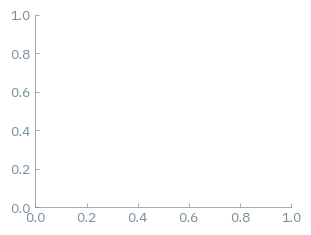

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"]
    - compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["sem"],
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"]
    + compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["sem"],
    alpha=0.5,
)


ax.plot(
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"],
    label="XGBoost baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"]
    - compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["sem"],
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"]
    + compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["sem"],
    alpha=0.5,
)


matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / mol kg$^{-1}$ Pa$^{-1}$ ", y_pad=-0.1)
ax.set_xscale("log")

ax.set_yscale("symlog")

range_frame(
    ax,
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"],
)


fig.savefig("co2_regression_res.pdf", bbox_inches="tight")

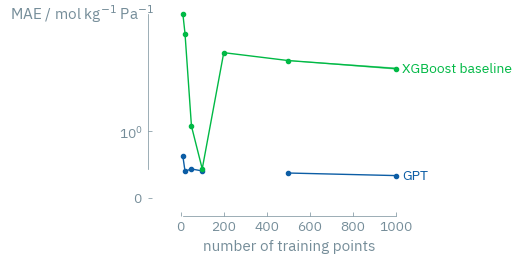

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"]
    - compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["sem"],
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"]
    + compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["sem"],
    alpha=0.5,
)


ax.plot(
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"],
    label="XGBoost baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"]
    - compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["sem"],
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"]
    + compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["sem"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / mol kg$^{-1}$ Pa$^{-1}$", y_pad=-0.1)

ax.set_yscale("symlog")

range_frame(
    ax,
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"],
)

fig.savefig("CH4_regression_res.pdf", bbox_inches="tight")